Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [15]:
import pandas as pd

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

Sanity checks

In [2]:
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    most_common_value = df[column].mode()[0]
    
    print(column.upper())
    print("min value:" + str(min_value))
    print("max value: " + str(max_value))
    print("max common value: " + str(most_common_value) + "\n")

SEX
min value:0.0
max value: 1.0
max common value: 1.0

AGE
min value:-5.0
max value: 101.0
max common value: 60.0

HYPERTENSION
min value:0
max value: 1
max common value: 0

HEART_DISEASE
min value:0
max value: 1
max common value: 0

EVER_MARRIED
min value:0
max value: 1
max common value: 1

WORK_TYPE
min value:0
max value: 4
max common value: 4

RESIDENCE_TYPE
min value:0
max value: 1
max common value: 1

AVG_GLUCOSE_LEVEL
min value:55.12
max value: 271.74
max common value: 94.39

BMI
min value:14.1
max value: 78.0
max common value: 31.4

SMOKING_STATUS
min value:0
max value: 1
max common value: 0

STROKE
min value:0
max value: 1
max common value: 0



Age feature contains values less than 0.
Proceed to drop them

EDA ON ORIGINAL DATASET

Categorical features frequencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()


Numerical features distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


Correlation matrix

In [ ]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

In [ ]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target

In [ ]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def print_stacked_barchart(column):
    grouped = df.groupby([column, 'stroke']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_barchart(column):
    plt.figure(figsize=(6, 6))
    sns.countplot(x='stroke', hue=column, data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()
    
def print_piechart(column):
    plt.figure(figsize=(6, 6))
    sns.pieplot(x=column, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_plots():
    for column in categorical_features:
        print_stacked_barchart(column)
        print_barchart(column)
        ##print_piechart(column)

print_plots()

DecisionTree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np


#Suddivdiamo il dataset in training set e test set (con test size del 30%)
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creazione del classificatore dell'albero decisionale
tree_classifier = DecisionTreeClassifier(random_state=42)

# Definizione della griglia degli iperparametri
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': np.arange(2, 51, 2),
    'min_samples_leaf': np.arange(1, 9),
    'max_depth': [None, 5, 10, 15, 20]
}

# Utilizzo di RandomizedSearchCV per una ricerca efficiente degli iperparametri
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=100, cv=10, scoring='roc_auc', random_state=42)

# Misurazione del tempo di inizio per la ricerca degli iperparametri
start_time_hyperparameter_search = time()
random_search.fit(X_train, y_train)
end_time_hyperparameter_search = time()
hyperparameter_search_time = end_time_hyperparameter_search - start_time_hyperparameter_search

# Ottenimento dei migliori parametri e del miglior stimatore
best_params = random_search.best_params_
best_tree_classifier = random_search.best_estimator_

# Stampa dei migliori parametri e del loro ROC AUC score sul set di addestramento
y_train_pred_prob = best_tree_classifier.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Addestramento del modello sull'intero set di addestramento e misurazione del tempo di addestramento
start_time_training = time()
best_tree_classifier.fit(X_train, y_train)
end_time_training = time()
dt_training_time = end_time_training - start_time_training

# Previsioni sui set di addestramento e test
y_train_pred = best_tree_classifier.predict(X_train)
y_test_pred = best_tree_classifier.predict(X_test)

# Stampa delle prestazioni sul set di addestramento
print("\nPrestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_train_pred))

# Stampa delle prestazioni sul set di test
print("\nPrestazioni sul Set di Test:")
print(classification_report(y_test, y_test_pred))

# Stampa dei migliori parametri e del tempo impiegato per la ricerca degli iperparametri e l'addestramento
print("\nMigliori Parametri:", best_params)
print("Tempo impiegato per la Ricerca degli Iperparametri:", hyperparameter_search_time, "secondi")
print("Tempo impiegato per l'Addestramento:", dt_training_time, "secondi")


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3463
           1       0.95      1.00      0.97      3537

    accuracy                           0.97      7000
   macro avg       0.98      0.97      0.97      7000
weighted avg       0.98      0.97      0.97      7000


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1537
           1       0.90      1.00      0.95      1463

    accuracy                           0.94      3000
   macro avg       0.95      0.95      0.94      3000
weighted avg       0.95      0.94      0.94      3000


Migliori Parametri: {'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Tempo impiegato per la Ricerca degli Iperparametri: 10.943546056747437 secondi
Tempo impiegato per l'Addestramento: 0.024289608001708984 secondi


AUC curve

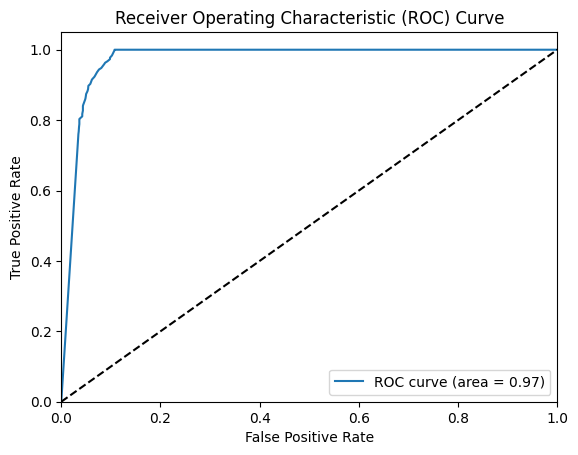

AUC Score: 0.9725893221253287


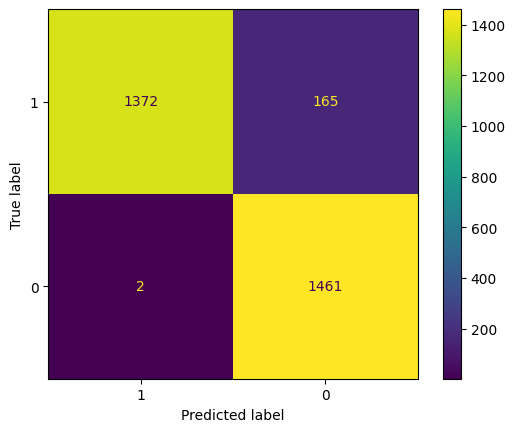

In [22]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = random_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


cm = confusion_matrix(y_test,y_test_pred)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
     

Confusion Matrix